# Download a MEA1k data set
This recording from a mouse? retina was done by [whom](http://pothal.com/wp-content/uploads/2016/08/unknown-user.jpg) at ETHZ?

In [1]:
import urllib
file_url = 'https://datasync.ed.ac.uk/public.php/webdav'

print('Downloading data file - this may take a while, patience...')
password_mgr = urllib.request.HTTPPasswordMgrWithDefaultRealm()
password_mgr.add_password(None, file_url, "Bu5OJl7kfP3bBT4", "HS2")
handler = urllib.request.HTTPBasicAuthHandler(password_mgr)
opener = urllib.request.build_opener(handler)
opener.open(file_url)
urllib.request.install_opener(opener)
with urllib.request.urlopen(file_url) as response, open('mea1k_data.h5', 'wb') as out_file:
    data = response.read()
    out_file.write(data)
print('...done')

AttributeError: module 'urllib' has no attribute 'request'

# Use of the `HSDetection` class

In [1]:
import sys
sys.path.append('..')
from hs2 import HSDetection
from probe import Mea1k

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

/disk/scratch/mhennig/venvs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)
/disk/scratch/mhennig/venvs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# raw data location
data_file = 'mea1k_data.h5'

# detection parameters
to_localize = True
cutout_start = 10
cutout_end = 30
threshold = 7
file_directory = 'results/'
file_name = 'ProcessedSpikes_mea1k'

In [3]:
Probe = Mea1k(data_file)
H = HSDetection(Probe, to_localize, cutout_start, cutout_end, threshold,
                maa=0, maxsl=12, minsl=3, ahpthr=0, out_file_name=file_name,
                file_directory_name=file_directory)

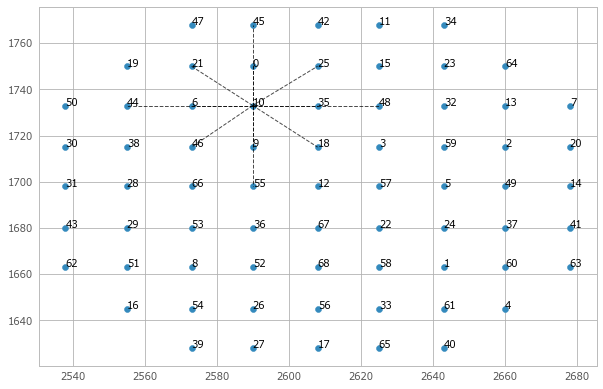

In [5]:
Probe.show(figwidth=10)

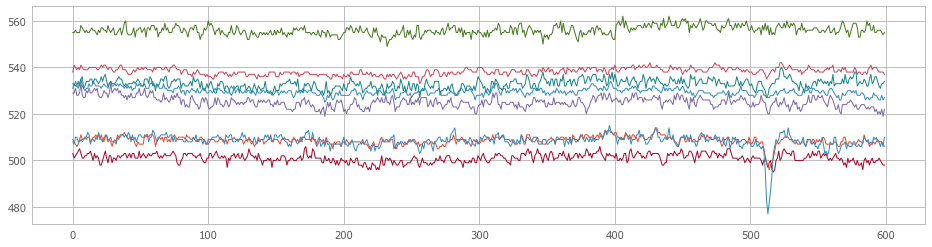

In [4]:
# plot some raw traces

t1,t2 = 0,5000
data = Probe.Read(t1,t2).reshape(t2-t1,Probe.num_channels)
plt.figure(figsize=(16,4))
ch = 67
for ch in range(60,68):
    plt.plot(data[4000:4600,ch])

In [6]:
H.DetectFromRaw()

# Sampling rate: 20000
# Localization On
# Not Masking any Channels
# Number of recorded channels: 69
# Analysing frames: 4450600, Seconds:222.53
# Frames before spike in cutout: 20
# Frames after spike in cutout: 44
# tcuts: 32 42
# tInc: 50000
# Analysing 50000 frames; from -32 to 50042
# Analysing 50000 frames; from 49968 to 100042
# Analysing 50000 frames; from 99968 to 150042
# Analysing 50000 frames; from 149968 to 200042
# Analysing 50000 frames; from 199968 to 250042
# Analysing 50000 frames; from 249968 to 300042
# Analysing 50000 frames; from 299968 to 350042
# Analysing 50000 frames; from 349968 to 400042
# Analysing 50000 frames; from 399968 to 450042
# Analysing 50000 frames; from 449968 to 500042
# Analysing 50000 frames; from 499968 to 550042
# Analysing 50000 frames; from 549968 to 600042
# Analysing 50000 frames; from 599968 to 650042
# Analysing 50000 frames; from 649968 to 700042
# Analysing 50000 frames; from 699968 to 750042
# Analysing 50000 frames; from 749968 to

In [4]:
H.LoadDetected()

Detected and read 2536 spikes.


Spike detected at channel:  67
Spike detected at frame:  4513
2610.628 1681.98


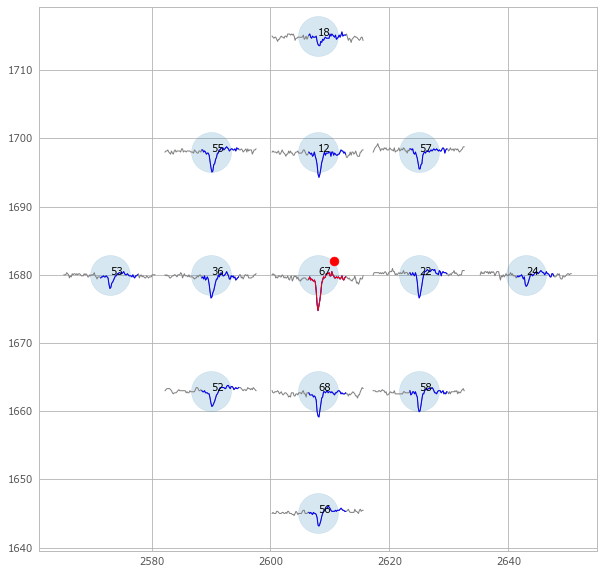

In [8]:
plt.figure(figsize=(10, 10))
H.PlotTracesChannels(0)

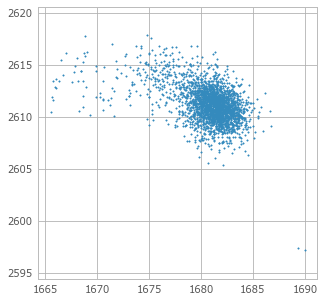

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
H.PlotAll(invert=True, s=2, alpha=1)
plt.axis('equal');

# Use of the `HSClustering` class

In [5]:
from hs2 import HSClustering
from sklearn.cluster import DBSCAN

In [6]:
# Load from file
#C = HSClustering(['../data/ProcessedSpikes_mea1k.bin'], cutout_length=41)

# Or if the spikes are already in memory
# simply load from the Detection class
C = HSClustering(H)

In [34]:
C.ShapePCA(pca_ncomponents=2, pca_whiten=True)
C.CombinedClustering(alpha=5, bandwidth=5, bin_seeding=False, n_jobs=-1)

Fitting PCA using 2536 spikes...
Clustering...
Clustering 2536 spikes...
number of seeds: 2536
seeds/job: 212
using 12 cpus


[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    1.0s remaining:    2.9s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    1.2s finished


Number of estimated units: 11


Text(0.5,1,'MEan Shift')

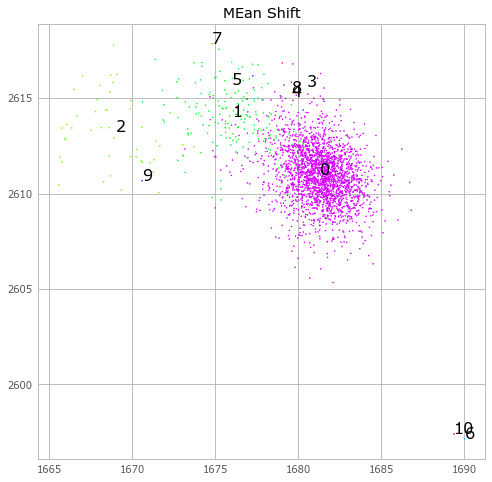

In [35]:
plt.figure(figsize=(8, 8))
ax = plt.subplot(111)
C.PlotAll(invert=True, s=1, show_labels=True)
plt.title("MEan Shift")


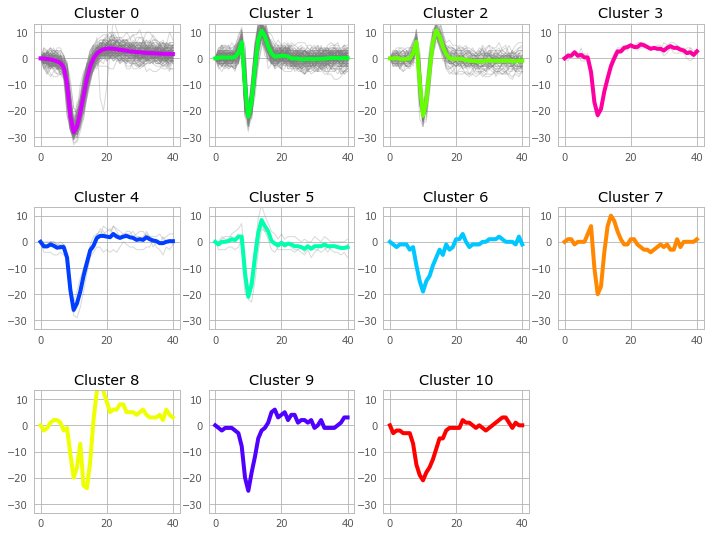

In [36]:
units = range(11)
C.PlotShapes(units)

In [30]:
C.CombinedClustering(eps=1., alpha=1.5, clustering_algorithm=DBSCAN,
                    min_samples=5, n_jobs=-1)

Clustering...
Clustering 2536 spikes...
Number of estimated units: 6
There are 113 unclustered events, these are now in cluster number 5


Text(0.5,1,'DBSCAN eps=0.2, min_samples=5')

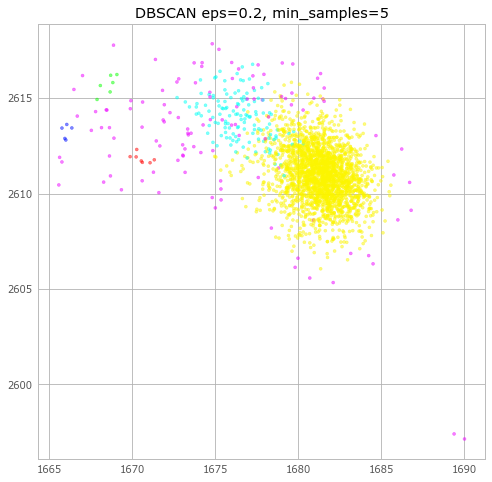

In [31]:
plt.figure(figsize=(8, 8))
C.PlotAll(invert=True, s=9,alpha=0.5)
plt.title("DBSCAN")


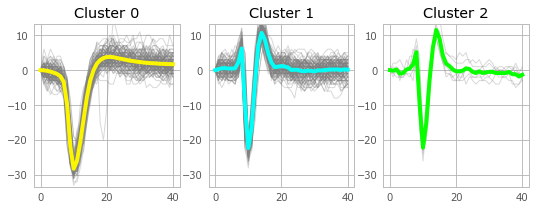

In [32]:
units = range(6)
C.PlotShapes(units)

In [ ]:
C.SaveHDF5(["mea1k_sorted.hdf5"])